In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Student_performance.csv")

In [3]:
df


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [10]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [63]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

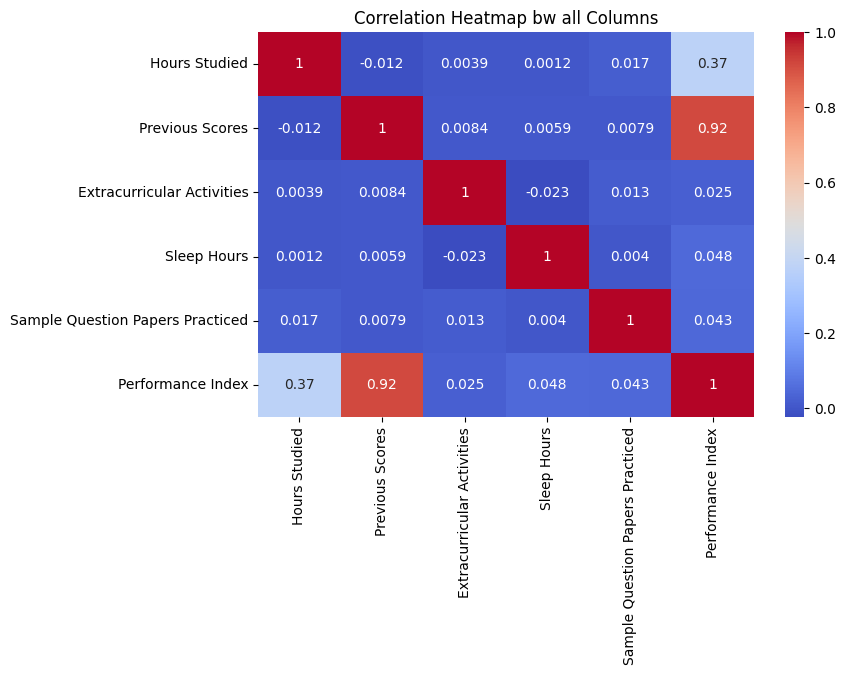

In [64]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap bw all Columns")
plt.show()

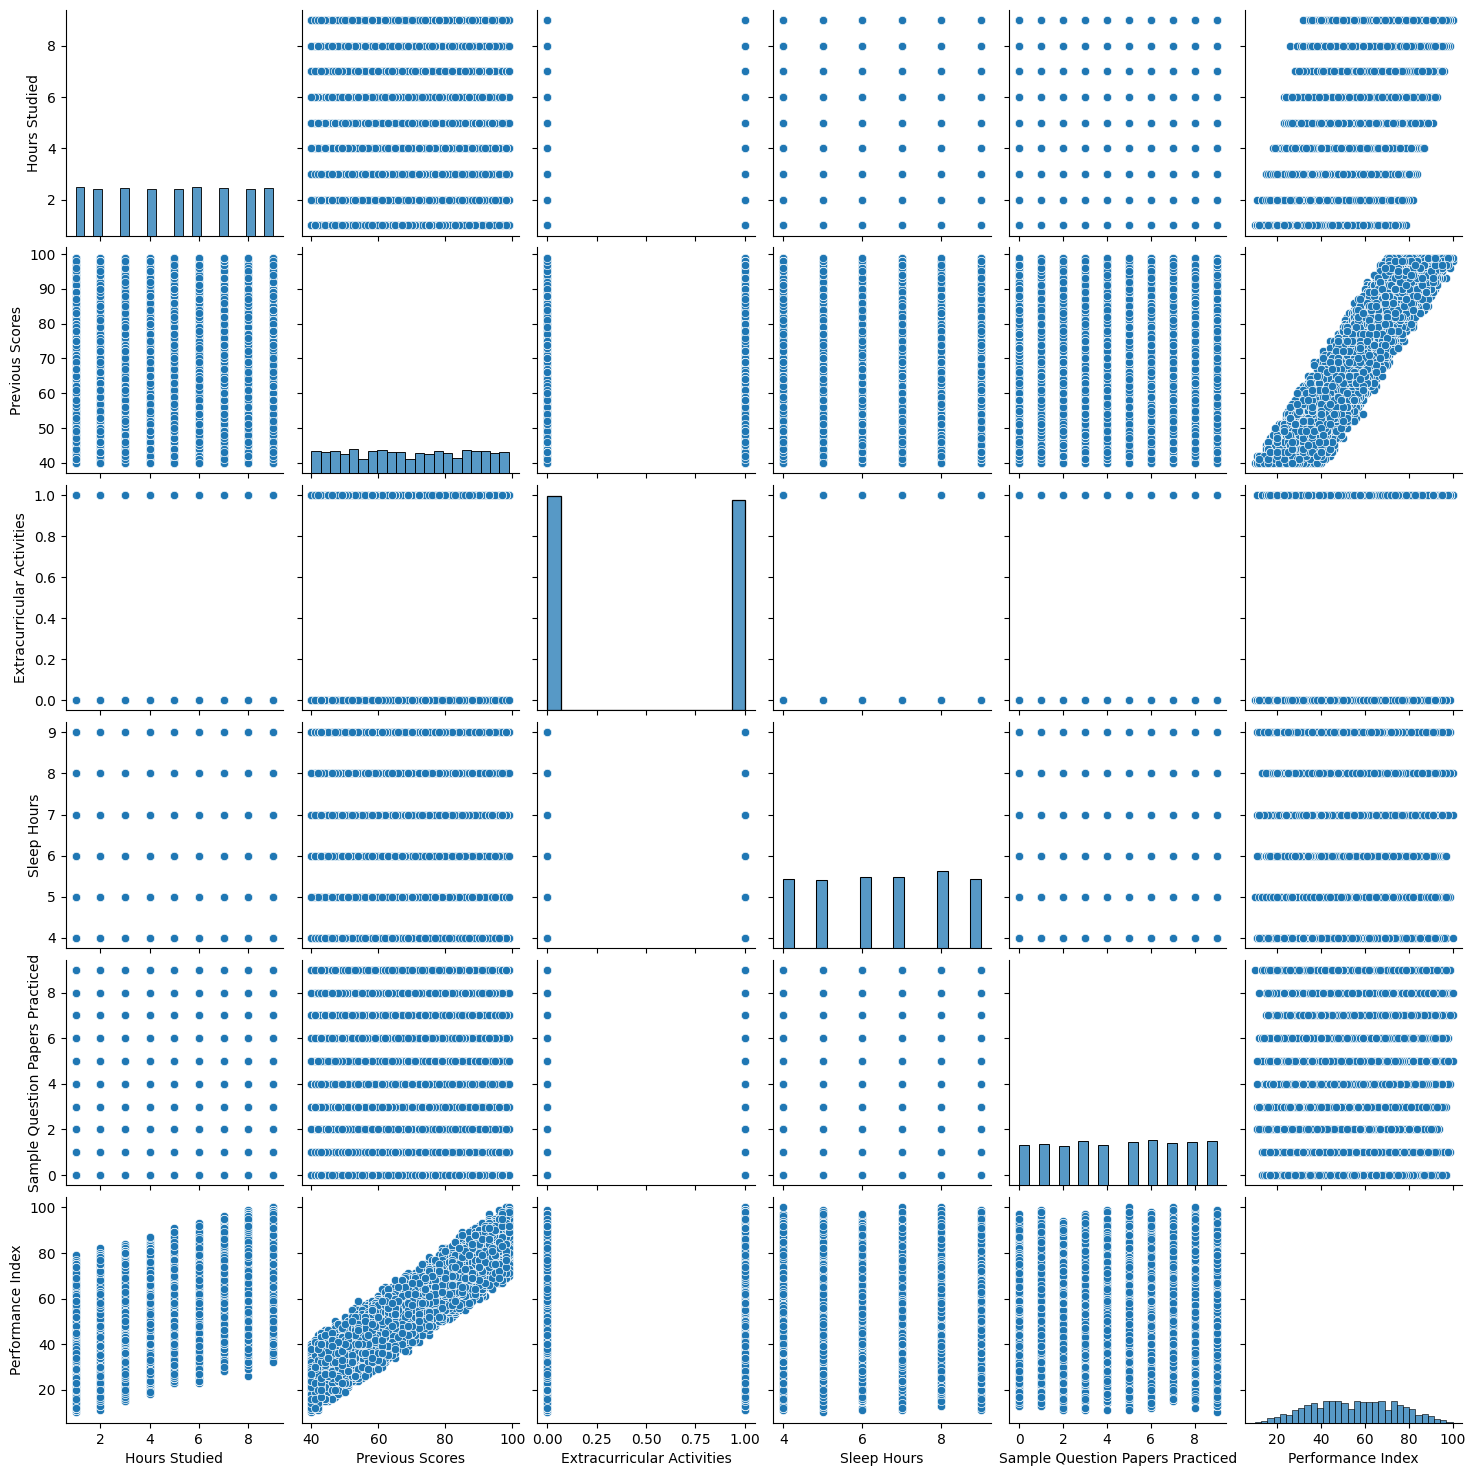

In [15]:
sns.pairplot(df)
plt.show()

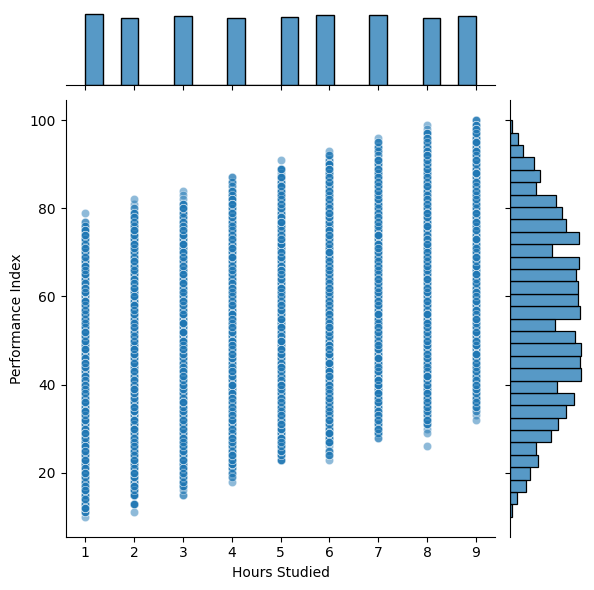

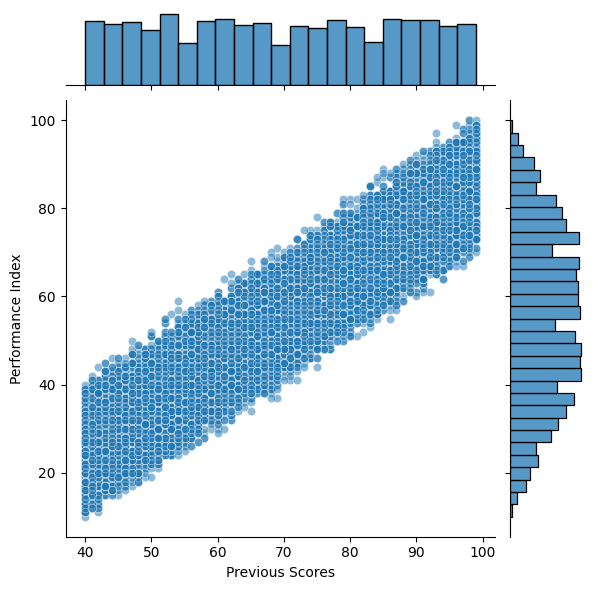

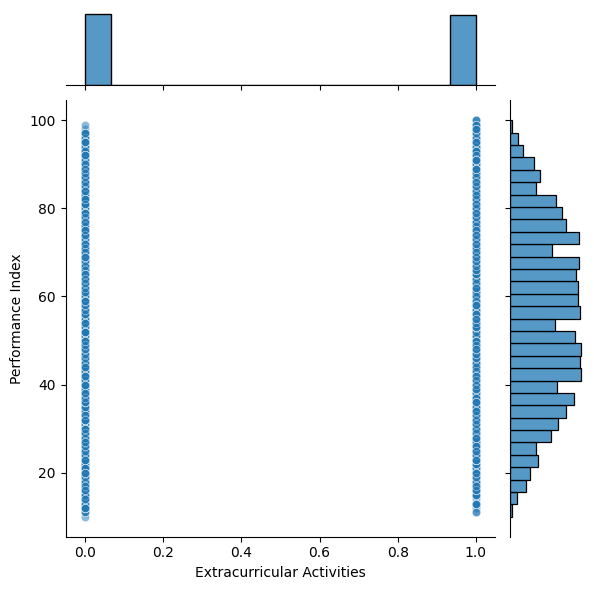

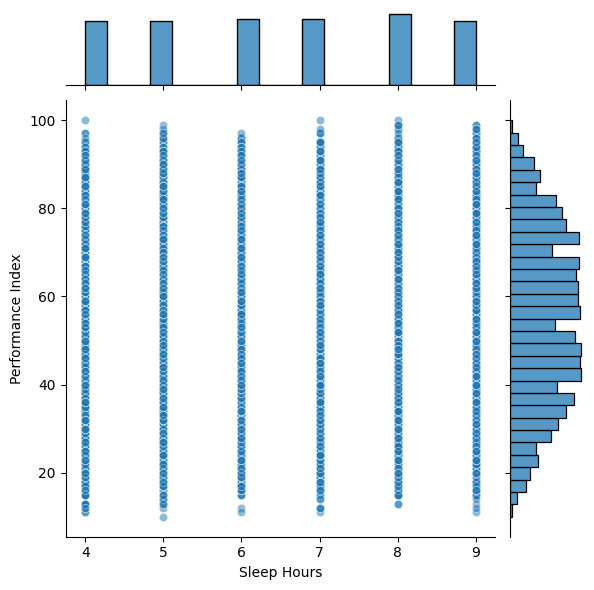

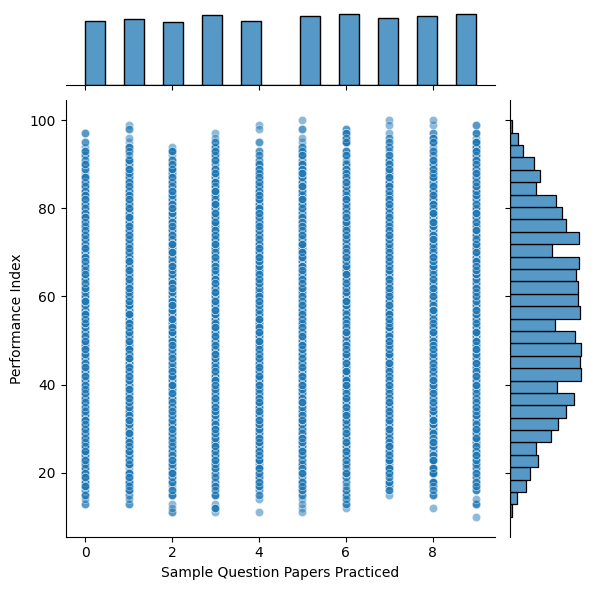

In [ ]:
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
            'Sleep Hours', 'Sample Question Papers Practiced']
#loop to run all the features at once vs the Performance Index
for feature in features:
    sns.jointplot(x=feature, y='Performance Index', data=df, kind='scatter', alpha=0.5)

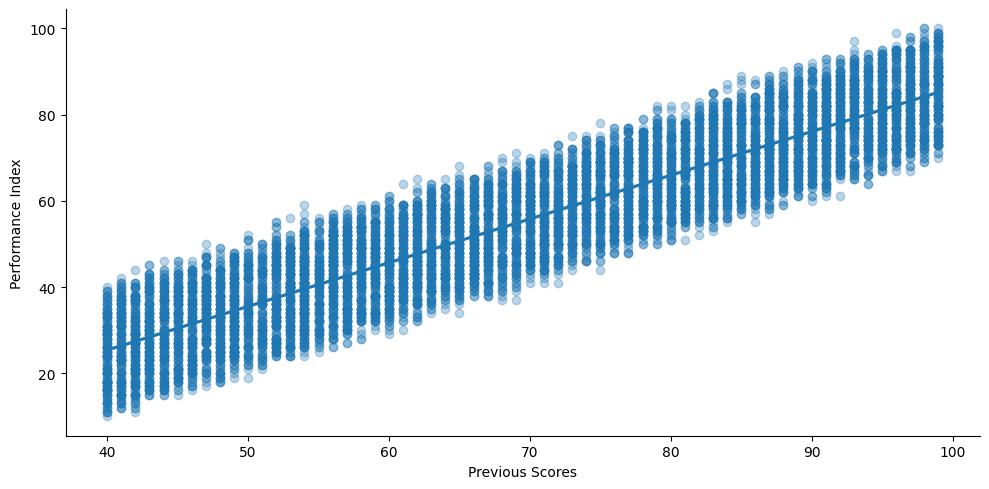

In [22]:
sns.lmplot(x='Previous Scores', y='Performance Index', data=df, scatter_kws={'alpha':0.3}, aspect=2.0)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
Y = df['Performance Index']

In [25]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [26]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Standardized Data : \n", X_scaled)

Standardized Data : 
 [[ 0.77518771  1.70417565  1.01045465  1.45620461 -1.24975394]
 [-0.38348058  0.72391268 -0.98965352 -1.49229423 -0.90098215]
 [ 1.16141048 -1.06362569  1.01045465  0.27680507 -0.90098215]
 ...
 [ 0.38896495  0.7815752   1.01045465  0.86650484  0.1453332 ]
 [ 1.54763324  1.5888506   1.01045465  0.27680507 -1.59852572]
 [ 0.77518771  0.26261245 -0.98965352  0.86650484 -1.24975394]]


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [36]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [37]:
X_train

array([[-0.38348058,  1.70417565,  1.01045465, -0.3128947 , -1.24975394],
       [ 0.38896495,  1.1852129 ,  1.01045465,  1.45620461, -0.55221037],
       [ 1.16141048, -0.71765053, -0.98965352, -0.3128947 , -1.24975394],
       ...,
       [ 1.54763324, -1.23661328, -0.98965352,  0.27680507,  0.49410499],
       [-1.54214888, -1.29427581, -0.98965352,  1.45620461, -1.59852572],
       [-1.15592611, -1.35193833, -0.98965352, -0.3128947 ,  0.49410499]],
      shape=(7000, 5))

In [38]:
Y_train

9069    82.0
2603    79.0
7738    50.0
1579    81.0
5058    52.0
        ... 
5734    48.0
5191    51.0
5390    44.0
860     20.0
7270    24.0
Name: Performance Index, Length: 7000, dtype: float64

In [39]:
X_test

array([[ 0.00274218, -0.02570019, -0.98965352,  0.86650484, -0.90098215],
       [-1.15592611, -1.35193833,  1.01045465, -1.49229423,  1.19164856],
       [ 0.77518771, -0.77531305,  1.01045465,  0.27680507,  0.1453332 ],
       ...,
       [ 0.00274218, -1.23661328,  1.01045465, -0.3128947 , -0.20343858],
       [-0.76970335,  0.95456279,  1.01045465,  1.45620461,  0.1453332 ],
       [ 0.38896495, -1.52492592,  1.01045465, -0.3128947 , -0.20343858]],
      shape=(3000, 5))

In [40]:
Y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
8014    32.0
1074    40.0
3063    33.0
6487    69.0
4705    29.0
Name: Performance Index, Length: 3000, dtype: float64

In [44]:
from sklearn. linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train , Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
print("Weights (coefficients):", lm.coef_)
print("Bias (intercept):", lm.intercept_)

Weights (coefficients): [ 7.40234001 17.61143377  0.2908407   0.81342538  0.54589896]
Bias (intercept): 55.254443868455084


In [46]:
lm.coef_

array([ 7.40234001, 17.61143377,  0.2908407 ,  0.81342538,  0.54589896])

In [47]:
cdf = pd.DataFrame(lm.coef_ , X.columns , columns = ['Coeff'])
print(cdf)

                                      Coeff
Hours Studied                      7.402340
Previous Scores                   17.611434
Extracurricular Activities         0.290841
Sleep Hours                        0.813425
Sample Question Papers Practiced   0.545899


In [49]:
X_test
predictions = lm.predict(X_test)

In [50]:
Y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
8014    32.0
1074    40.0
3063    33.0
6487    69.0
4705    29.0
Name: Performance Index, Length: 3000, dtype: float64

In [51]:
predictions

array([54.74728554, 22.61884434, 47.93665124, ..., 33.42451751,
       67.92578967, 31.20587077], shape=(3000,))

In [53]:
print(predictions.mean())
print(Y_test.mean())
print(X_test.mean())


54.91547956151694
54.81666666666667
-0.0075705990874194795


<Axes: xlabel='Performance Index'>

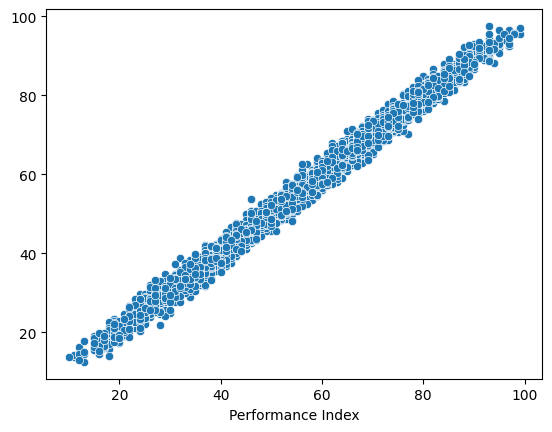

In [54]:
sns.scatterplot(x=Y_test , y=predictions)

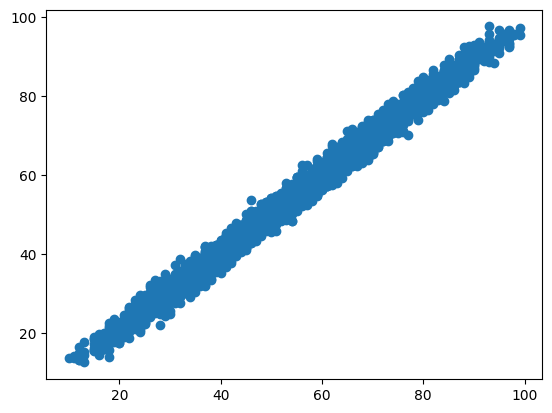

In [55]:
x = Y_test
y = predictions
plt.scatter(x,y)
plt.show()

In [56]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import math

In [57]:
print("Mean absolute Error:" , mean_absolute_error(y_test , predictions))
print("Mean Squared Error:" , mean_squared_error(y_test , predictions))
print("Root Mean Squared Error:" , np.sqrt(mean_squared_error(y_test , predictions)))


Mean absolute Error: 1.6090437564045226
Mean Squared Error: 4.066563824092685
Root Mean Squared Error: 2.0165722957763466


In [59]:
residuals = Y_test - predictions
residuals   

6252   -3.747286
4684   -2.618844
1731   -1.936651
4742   -3.340099
4521   -2.059743
          ...   
8014    0.180225
1074    2.496955
3063   -0.424518
6487    1.074210
4705   -2.205871
Name: Performance Index, Length: 3000, dtype: float64

/var/folders/35/h2vzj0092n76sg7z3vjwcv3r0000gn/T/ipykernel_64581/983737046.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=20)


<Axes: xlabel='Performance Index', ylabel='Density'>

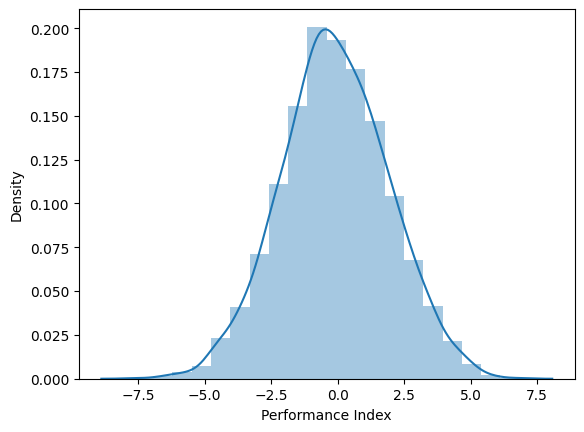

In [60]:
sns.distplot(residuals, bins=20)

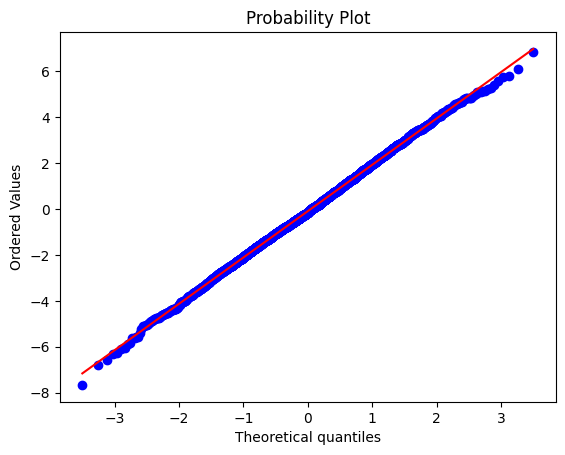

In [61]:
import pylab
import scipy.stats as stats
stats.probplot(residuals , dist = 'norm' , plot = pylab)
pylab.show()

In [62]:
ss_res = np.sum((y_test - predictions) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print("R² Score:", r2)


R² Score: 0.9890110607021136
